Reference:https://github.com/suragnair/alpha-zero-general/tree/master/othello

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:

class Board:
    def __init__(self, player1, player2, n=8):
        self.n = n
        self.board = [[0] * n for _ in range(n)]
        self.current_play = 1
        self.reset()
        self.player1 = player1
        self.player2 = player2
        self.done = False
        self.directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

    def reset(self):
        n = self.n
        self.board = [[0] * n for _ in range(n)]
        self.current_play = 1
        board = self.board
        if n % 2 == 0:
            mid = n // 2
            board[mid - 1][mid - 1] = 1
            board[mid][mid] = 1
            board[mid - 1][mid] = -1
            board[mid][mid - 1] = -1

    def __getitem__(self, index):
        return self.board[index]

    def countDiff(self, color):
        count = 0
        for j in range(self.n):
            for i in range(self.n):
                if self[i][j] == color:
                    count += 1
                if self[i][j] == -color:
                    count -= 1
        return count

    def get_legal_moves(self, color):
        moves = set()  # stores the legal moves.
        for j in range(self.n):
            for i in range(self.n):
                if self[i][j] == color:
                    newmoves = self.get_moves_for_square((i, j))
                    moves.update(newmoves)
        return list(moves)

    def has_legal_moves(self, color):
        for j in range(self.n):
            for i in range(self.n):
                if self[i][j] == color:
                    newmoves = self.get_moves_for_square((i, j))
                    if len(newmoves) > 0:
                        return True
        return False

    def get_moves_for_square(self, square):
        (i, j) = square
        color = self[i][j]
        if color == 0:
            return []
        # search all possible directions.
        moves = []
        for direction in self.directions:
            move = self._discover_move(square, direction)
            if move:
                moves.append(move)
        # return the generated move list
        return moves

    def execute_move(self, move, color):
        flips = []
        for direction in self.directions:
            flip = self._get_flips(move, direction, color)
            flips.extend(flip)

        if flips:
            for i, j in flips:
                self[i][j] = color
        else:
            raise Exception("Invalid move")
        row, col = move
        self[row][col] = color

    def _discover_move(self, origin, direction):
        i, j = origin
        color = self[i][j]
        flips = []
        for i, j in self._increment_move(origin, direction, self.n):
            if self[i][j] == 0:
                if flips:
                    return (i, j)
                else:
                    return None
            elif self[i][j] == color:
                return None
            elif self[i][j] == -color:
                flips.append((i, j))
        return None

    def _get_flips(self, origin, direction, color):
        flips = []
        for i, j in self._increment_move(origin, direction, self.n):
            if self[i][j] == 0:
                return []
            if self[i][j] == -color:
                flips.append((i, j))
            elif self[i][j] == color and len(flips) > 0:
                return flips
        return []

    def _increment_move(self, move, direction, n):
        i, j = move
        move = (i + direction[0], j + direction[1])
        while 0 <= move[0] < n and 0 <= move[1] < n:
            yield move
            move = (move[0] + direction[0], move[1] + direction[1])

    def step(self, action):
        if self.done:
            raise Exception("Game is already finished")
        legal_moves = self.get_legal_moves(self.current_play)
        if action not in legal_moves:
            raise Exception("Invalid move")
        self.execute_move(action, self.current_play)
        self.current_play = -self.current_play
        
        # Check if the game is over
        if not self.has_legal_moves(1) and not self.has_legal_moves(-1):
            self.done = True
        reward = 0 if not self.done else self.get_reward()
        return self.board, reward, self.done

    def get_reward(self):
        player1_score = self.countDiff(1)
        player2_score = self.countDiff(-1)
        if player1_score > player2_score:
            return 1  # Player 1 (Black) wins
        elif player1_score < player2_score:
            return -1  # Player 2 (White) wins
        else:
            return 0  # It's a draw

    def game_over(self):
        return not self.has_legal_moves(1) and not self.has_legal_moves(-1)
    
    def play(self,total_games):
        random_wins1 = 0
        random_wins2 = 0
        draws = 0

        for i in range(total_games):
            self.reset()  # Reset the board for each game.
            current_player = self.player1 if self.current_play == 1 else self.player2
            while True:
                #self.print_board()
                if self.has_legal_moves(current_player.color):
                    #print(f"{current_player.name}'s Turn")
                    move = current_player.get_move(self)
                    if move:
                        self.execute_move(move, current_player.color)
                        current_player = self.player2 if current_player == self.player1 else self.player1
#                         current_player = player1 if current_player == player2  else player2  
                else:
                    #print("No legal moves for the current player.")
                    current_player = self.player2 if current_player == self.player1 else self.player1
#                     current_player = player1 if current_player == player2  else player2  #player2 

                if not (self.has_legal_moves(player1.color) or self.has_legal_moves(player2.color)):
                    break

            #self.print_board()
            winner = self.get_reward()
            if winner == player1.color:
                random_wins1 += 1
                #print(f"{player1.name} wins!")
            elif winner == player2.color:
                random_wins2 += 1
                #print(f"{player2.name} wins!")
            else:
                draws += 1
                #print("It's a draw!")

        return random_wins1, random_wins2, draws

In [3]:

class Player:
    def __init__(self, color, name):
        self.color = color
        self.name = name

    def get_move(self, board):
        legal_moves = board.get_legal_moves(self.color)
        if legal_moves:
            return random.choice(legal_moves)
        return None


training...
Number of Games: 100
Winning Probability of Player 1: 49.00%
Winning Probability of Player 2: 49.00%
Winning Probability of draws: 2.00%
--------
Number of Games: 600
Winning Probability of Player 1: 44.67%
Winning Probability of Player 2: 51.67%
Winning Probability of draws: 3.67%
--------
Number of Games: 1100
Winning Probability of Player 1: 48.27%
Winning Probability of Player 2: 48.27%
Winning Probability of draws: 3.45%
--------
Number of Games: 1600
Winning Probability of Player 1: 47.88%
Winning Probability of Player 2: 48.44%
Winning Probability of draws: 3.69%
--------
Number of Games: 2100
Winning Probability of Player 1: 46.19%
Winning Probability of Player 2: 50.24%
Winning Probability of draws: 3.57%
--------
Number of Games: 2600
Winning Probability of Player 1: 46.54%
Winning Probability of Player 2: 49.38%
Winning Probability of draws: 4.08%
--------
Number of Games: 3100
Winning Probability of Player 1: 46.71%
Winning Probability of Player 2: 49.23%
Winnin

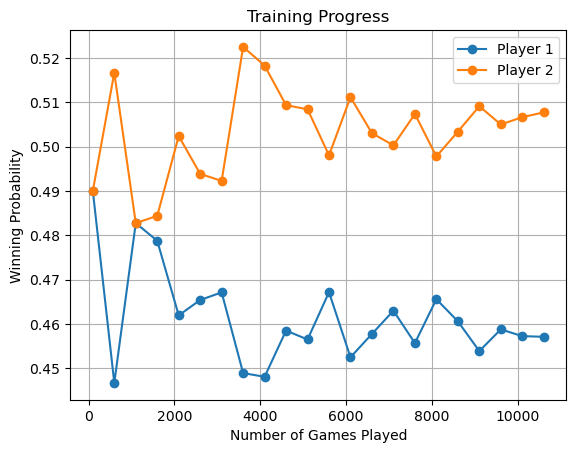

In [4]:
if __name__ == "__main__":
    
    player1 = Player(1, "Random player1")
    player2 = Player(-1, "Random player2")
    st = Board(player1,player2,n=8)
    
    print("training...")
    winning_game_p1 = []
    winning_game_p2 = []
    draws_game=[]
    num_games = []

    for rounds in range(100, 11000, 500):
        random_wins1, random_wins2, draws = st.play(rounds)
        num_games.append(rounds)
        winning_game_p1.append(random_wins1 / rounds)  
        winning_game_p2.append(random_wins2 / rounds)  
        draws_game.append(draws / rounds) 
        print(f"Number of Games: {rounds}")
        print(f"Winning Probability of Player 1: {random_wins1 / rounds:.2%}")
        print(f"Winning Probability of Player 2: {random_wins2 / rounds:.2%}")
        print(f"Winning Probability of draws: {draws / rounds:.2%}")
        print("--------")

    plt.plot(num_games, winning_game_p1, marker='o', label="Player 1")
    plt.plot(num_games, winning_game_p2, marker='o', label="Player 2")  
    plt.xlabel("Number of Games Played")
    plt.ylabel("Winning Probability")
    plt.title("Training Progress")
    plt.legend()
    plt.grid(True)
    plt.show()